In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [2]:
datagambar = 'Datasets/datasets'
file_list = pd.DataFrame(os.listdir(datagambar), columns=['Files_Name'])
print(file_list)

     Files_Name
0     .DS_Store
1       battery
2    biological
3   brown-glass
4     cardboard
5       clothes
6   green-glass
7         metal
8         paper
9       plastic
10        shoes
11        trash
12  white-glass


In [3]:
# Mencari file-file gambar dalam direktori yang telah ditentukan
files = [i for i in glob.glob(datagambar + "//*//*")]

# Mengacak urutan file-file tersebut
np.random.shuffle(files)

# Mendapatkan label untuk setiap file berdasarkan nama direktori induknya
labels = [os.path.dirname(i).split("/")[-1] for i in files]

# Menggabungkan setiap file dengan labelnya
data = zip(files, labels)

# Membuat DataFrame dari pasangan file-label
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])

# Mengembalikan DataFrame yang berisi informasi file gambar dan labelnya
dataframe

,Image,Label
0,Datasets/datasets\green-glass\green-glass545.jpg,datasets\green-glass
1,Datasets/datasets\clothes\clothes243.jpg,datasets\clothes
2,Datasets/datasets\biological\biological174.jpg,datasets\biological
3,Datasets/datasets\clothes\clothes673.jpg,datasets\clothes
4,Datasets/datasets\white-glass\white-glass507.jpg,datasets\white-glass
...,...,...
17536,Datasets/datasets\shoes\shoes1341.jpg,datasets\shoes
17537,Datasets/datasets\brown-glass\brown-glass545.jpg,datasets\brown-glass
17538,Datasets/datasets\brown-glass\brown-glass266.jpg,datasets\brown-glass
17539,Datasets/datasets\battery\battery518.jpg,datasets\battery


In [4]:
# Menghitung jumlah kemunculan setiap label
label_counts = dataframe["Label"].value_counts()
label_counts

Label
datasets\clothes        5325
datasets\shoes          1977
datasets\paper          1644
datasets\plastic        1347
datasets\cardboard      1294
datasets\metal          1179
datasets\biological      985
datasets\battery         945
datasets\trash           834
datasets\white-glass     775
datasets\green-glass     629
datasets\brown-glass     607
Name: count, dtype: int64

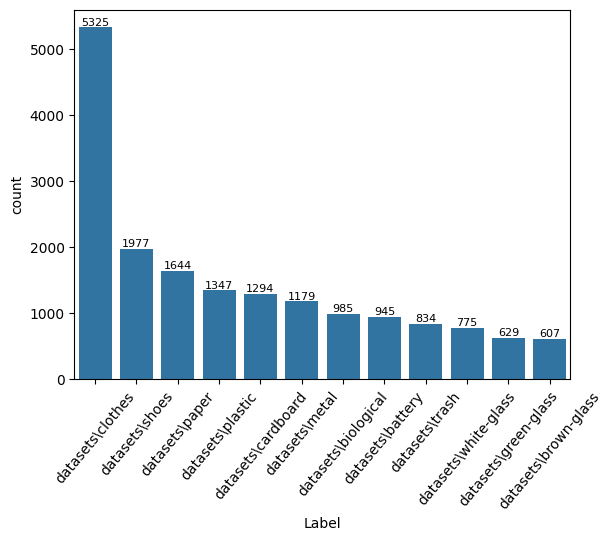

In [5]:
# Menghitung jumlah kemunculan setiap label
label_counts = dataframe["Label"].value_counts()

# Mengurutkan data berdasarkan jumlah kemunculan label
label_counts_sorted = label_counts.sort_values(ascending=False)

# Membuat countplot dengan data yang sudah diurutkan
sns.countplot(x=dataframe["Label"], order=label_counts_sorted.index)

# Menambahkan angka rincian di atas setiap batang
for i, count in enumerate(label_counts_sorted):
    plt.text(i, count, str(count), ha="center", va="bottom", fontsize=8)

# Mengatur rotasi label sumbu x
plt.xticks(rotation=50)

# Menampilkan plot
plt.show()

In [6]:
train_data_dir =datagambar
batch_size = 128                           
target_size = (180,180)
validation_split = 0.2

In [7]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,                                                         # de 100 para 50
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,                                                         # de 200 para 100
    image_size=target_size,
    batch_size=batch_size,
)

Found 17541 files belonging to 12 classes.
Using 14033 files for training.
Found 17541 files belonging to 12 classes.
Using 3508 files for validation.


In [8]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

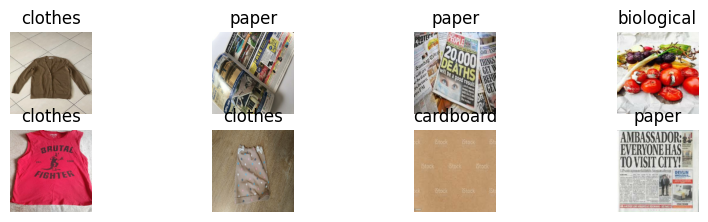

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
history = model.fit(train, validation_data=validation, epochs=50, callbacks=[early_stopping])


Epoch 1/50


110/110 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.2938 - loss: 2.2672 - val_accuracy: 0.5539 - val_loss: 1.4474
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.5132 - loss: 1.4693 - val_accuracy: 0.6548 - val_loss: 1.1487
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.5988 - loss: 1.2259 - val_accuracy: 0.6987 - val_loss: 0.9592
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.6387 - loss: 1.1186 - val_accuracy: 0.7574 - val_loss: 0.7602
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.6852 - loss: 0.9535 - val_accuracy: 0.7842 - val_loss: 0.6992
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.7080 - loss: 0.8906 - val_accuracy: 0.7973 - val_loss: 0.6386
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.7406 - loss: 0.7957 - val_accuracy: 0.8298 - val_loss: 0.5417
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.7645 - loss: 0.6993 - val_accuracy: 0.856

In [12]:
val_loss, val_accuracy = model.evaluate(validation)
print(f'Akurasi validasi: {val_accuracy*100:.2f}%')


28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 421ms/step - accuracy: 0.9468 - loss: 0.2417
Akurasi validasi: 94.18%


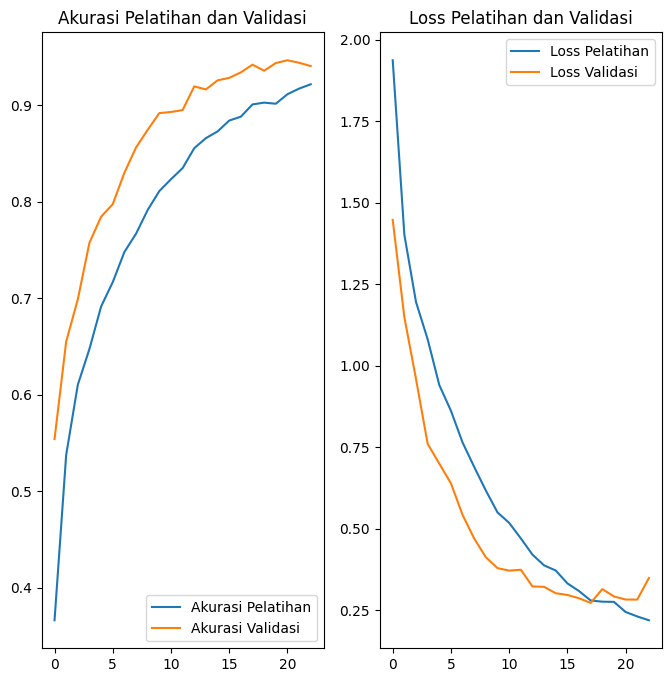

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Pelatihan')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Pelatihan')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')
plt.show()